#Data Mining assignment
Find attached dataset for the classification task. The dataset contains 614 observations , 11 features, and one target variable (Loan_Status).


*   The features are: **Income_of_Applicant, Income_of_Joint_Applicant, Loan_Amount_Requirement, Loan_Amount_Term, Credit_History, Gender, Is_Married, No_of_Dependents, Level_of_Education, IS_Self_Employed, Area_of_Property**.

*   The target variable is : **Loan_Status**






In [42]:
#importing Libraries

# numpy and pandas imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# ML Libraries for scikit
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn import tree
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,\
                            precision_recall_curve,precision_score,recall_score,roc_auc_score,roc_curve,\
                            matthews_corrcoef, f1_score, make_scorer, auc
from scipy.stats import skew
from sklearn.model_selection import cross_val_score,KFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from pylab import plot, show, subplot, specgram, imshow, savefig
from sklearn import preprocessing
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import Normalizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score

import random
random.seed(23)

#  Recursive Feature Elimination
from sklearn.feature_selection import RFE
        
# Python imports
from math import log, sqrt
import re
import collections
import warnings

# decision tree visualization related imports
import pydotplus
import graphviz

from IPython.display import Image

warnings.filterwarnings('ignore')

pd.options.display.max_columns = 400

In [43]:
#importing data and reading it as dataframe for EDA
df = pd.read_csv('/content/drive/My Drive/DataSets/Akhil_Ass/loan data.csv')

In [44]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [45]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [46]:
print(df.isnull().sum()) #checking missing data 
print('null values in percentage')
print(df.isna().mean().round(4) * 100)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
null values in percentage
Loan_ID              0.00
Gender               2.12
Married              0.49
Dependents           2.44
Education            0.00
Self_Employed        5.21
ApplicantIncome      0.00
CoapplicantIncome    0.00
LoanAmount           3.58
Loan_Amount_Term     2.28
Credit_History       8.14
Property_Area        0.00
Loan_Status          0.00
dtype: float64


In [47]:
df = df.dropna() #removed null values 
print(df.isnull().sum())

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    object 
 2   Married            480 non-null    object 
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    object 
 5   Self_Employed      480 non-null    object 
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    object 
 12  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 52.5+ KB


# EDA

In [49]:
df.drop("Loan_ID", axis=1, inplace=True) #removed loan id as its not that import for analysis

In [50]:
df['Dependents']=df['Dependents'].replace('3+','3') #replacing '3+' as '3'

In [51]:
df['Dependents'].value_counts()

0    274
2     85
1     80
3     41
Name: Dependents, dtype: int64

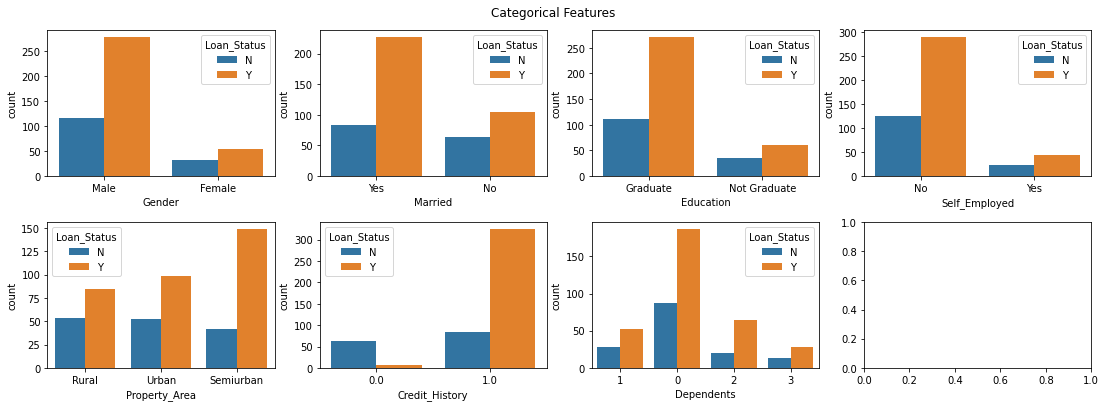

In [52]:
cat = ['Gender', 'Married','Education','Self_Employed','Property_Area','Credit_History','Dependents']
nume =['Loan_ID','ApplicantIncome', 'CoapplicantIncome','LoanAmount', 'Loan_Amount_Term'] 
fig, ax = plt.subplots(2,4)
fig.set_size_inches(16,6)
fig.suptitle('Categorical Features')
for i in range(len(cat)):
    row,col = int(i/4), i%4
    sns.countplot(x=cat[i], hue="Loan_Status", data=df, ax=ax[row,col])
#     ax[row,col].set_title(cat_cols[i])

plt.tight_layout(pad=3.0, w_pad=0.5, h_pad=1.0)
plt.show()

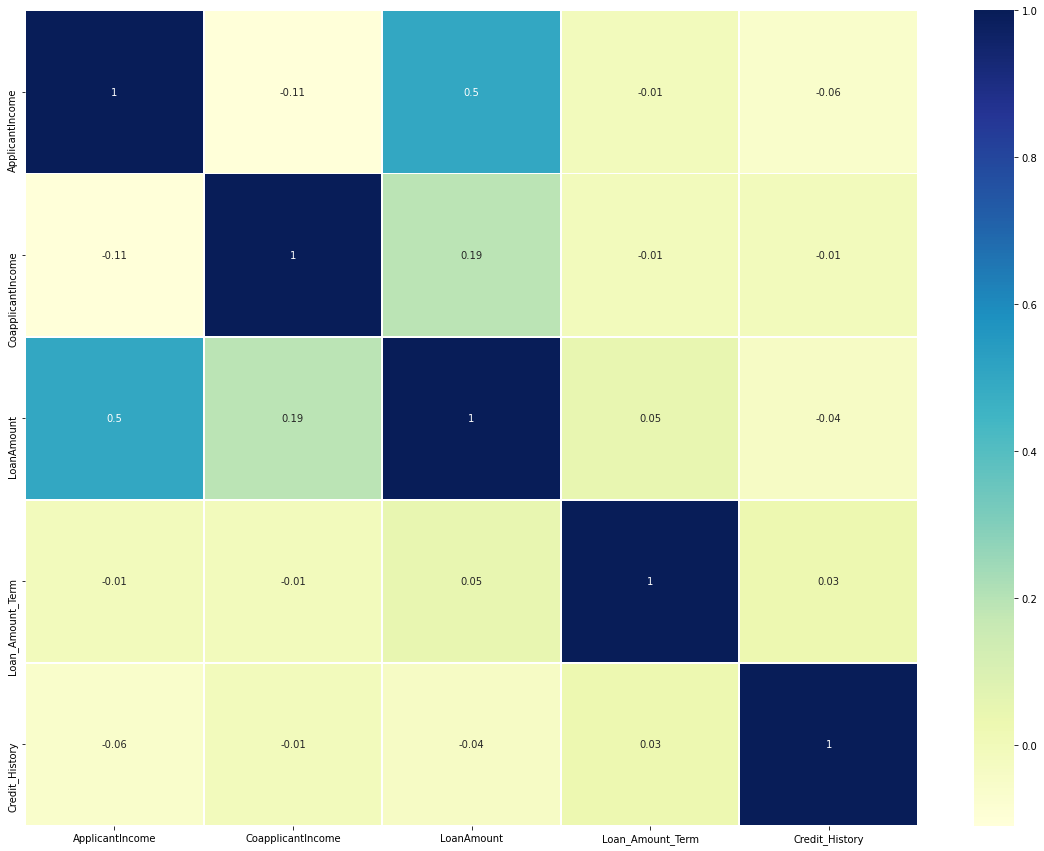

In [53]:
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(data=df.corr().round(2), annot=True, linewidths=0.7, cmap='YlGnBu')
plt.show()

## Feature Engineering


In [54]:
#Converting catagorial features to numerial features for model to understand
categories = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area']
cat = pd.DataFrame()
cat = pd.get_dummies(df[categories])
df = pd.concat([df,cat],axis=1)
df= df.drop(columns=categories)

In [55]:
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,4583,1508.0,128.0,360.0,1.0,N,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,Y,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,Y,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,Y,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
5,5417,4196.0,267.0,360.0,1.0,Y,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ApplicantIncome          480 non-null    int64  
 1   CoapplicantIncome        480 non-null    float64
 2   LoanAmount               480 non-null    float64
 3   Loan_Amount_Term         480 non-null    float64
 4   Credit_History           480 non-null    float64
 5   Loan_Status              480 non-null    object 
 6   Gender_Female            480 non-null    uint8  
 7   Gender_Male              480 non-null    uint8  
 8   Married_No               480 non-null    uint8  
 9   Married_Yes              480 non-null    uint8  
 10  Dependents_0             480 non-null    uint8  
 11  Dependents_1             480 non-null    uint8  
 12  Dependents_2             480 non-null    uint8  
 13  Dependents_3             480 non-null    uint8  
 14  Education_Graduate       4

In [57]:
#Scaling
to_scale = ['ApplicantIncome','CoapplicantIncome','LoanAmount']
scaler= RobustScaler()
df[to_scale] = scaler.fit_transform(df[to_scale])

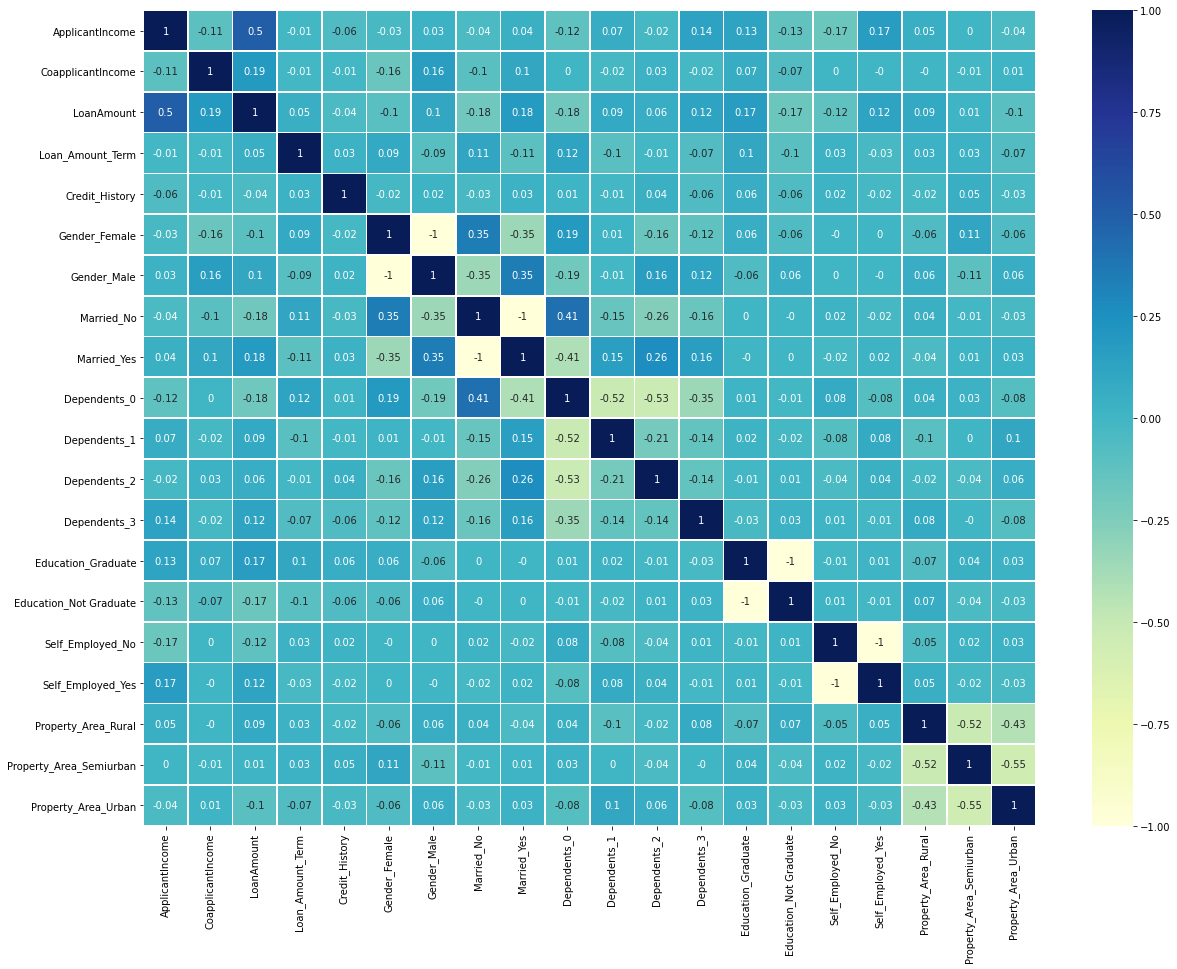

In [58]:
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(data=df.corr().round(2), annot=True, linewidths=0.7, cmap='YlGnBu')
plt.show()

In [59]:
df.head(10)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,0.245112,0.187951,0.000000,360.0,1.0,N,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,-0.290817,-0.481305,-0.885714,360.0,1.0,Y,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,-0.431993,0.565184,-0.114286,360.0,1.0,Y,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,0.724841,-0.481305,0.185714,360.0,1.0,Y,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
5,0.527465,1.380894,1.985714,360.0,1.0,Y,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1
6,-0.516631,0.191501,-0.471429,360.0,1.0,Y,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
7,-0.278629,0.629979,0.428571,360.0,0.0,N,0,1,0,1,0,0,0,1,1,0,1,0,0,1,0
8,0.049767,0.195939,0.571429,360.0,1.0,Y,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
9,3.040880,4.386331,3.157143,360.0,1.0,N,0,1,0,1,0,1,0,0,1,0,1,0,0,1,0
10,-0.223106,-0.170642,-0.828571,360.0,1.0,Y,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1


## Model Training


In [60]:
X = df.drop('Loan_Status',axis=1)
y = df['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train1, X_val, y_train1, y_val = train_test_split(X_train,y_train, test_size=0.10, random_state=42) #One Fold Cross Validation

In [61]:
#Applying KFold to guage which algorithm performs better
seed = 7
scoring = 'accuracy'
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('RF', RandomForestClassifier()))
models.append(('DT', DecisionTreeClassifier()))


# evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f" % (name, cv_results.mean())
    print(msg)

LR: 0.804723
RF: 0.796761
DT: 0.689946


In [62]:
#Logistic Regression    
LR=LogisticRegression()
LR.fit(X_train1,y_train1)
y_pred_val = LR.predict(X_val)
print ('Accuracy on validation set(LR): {}'.format(accuracy_score(y_pred_val,y_val))) #Accuracy on validation set

LR.fit(X_train,y_train)
y_pred_test = LR.predict(X_test)
print ('Accuracy on test set of training data(LR): {}'.format(accuracy_score(y_pred_test,y_test))) #Accuracy on test set of training data

Accuracy on validation set(LR): 0.8461538461538461
Accuracy on test set of training data(LR): 0.8229166666666666


In [63]:
#Random Forest

clf = RandomForestClassifier()
params = {'n_estimators': [10,50,100], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2,4,6,8,16], 
              'min_samples_split': [2, 3, 5, 10, 15,20,25,30,35],
              'min_samples_leaf': [1,3,5,8,50,100]
             }
grid = GridSearchCV(clf,params)
grid.fit(X_train1,y_train1)
y_pred_val = grid.predict(X_val)
print ('Accuracy on validation set(RF): {}'.format(accuracy_score(y_pred_val,y_val))) #Accuracy on validation set

grid.fit(X_train,y_train)
y_pred_test = grid.predict(X_test)
print ('Accuracy on test set of training data(RF): {}'.format(accuracy_score(y_pred_test,y_test))) #Accuracy on test set of training data

Accuracy on validation set(RF): 0.8461538461538461
Accuracy on test set of training data(RF): 0.7916666666666666
